# Regressão Linear para Previsão de Preços de Carros

## 1) Imports

In [18]:
# Import de bibliotecas necessárias
import pandas as pd
import numpy as np
import joblib as jl
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_transformed.csv')
df.sample(10)




,Engine_Size,Mileage,Price,Age,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
8620,3.9,201968,11660,6,True,False,False,False,True
9908,4.9,282214,11955,8,True,False,False,False,False
5765,4.4,234437,7911,18,True,False,False,True,False
3118,1.6,202711,7645,10,False,False,True,False,False
113,3.0,180938,9881,7,False,True,False,False,True
9578,4.3,155464,12590,9,False,True,False,False,False
1409,1.5,199403,10511,2,True,False,False,False,True
2873,1.3,290532,2000,20,False,False,False,False,True
7317,2.7,2339,11453,21,True,False,False,False,False
5237,3.8,94430,10511,10,False,False,True,False,True


## 2) Separação de dados

### Features e Target:

In [41]:
# Features
features = df.copy().drop('Price', axis=1)

# Target
target = df['Price'].copy()

print(f'Features shape: {features.shape}')
print(f'Target shape: {target.shape}')

Features shape: (10000, 8)
Target shape: (10000,)


> Features: `Engine_Size`, `Mileage`, `Age`, `Fuel_Type_Electric`, `Fuel_Type_Hybrid`, `Fuel_Type_Petrol`, `Transmission_Manual`, `Transmission_Semi_Automatic` (VARIÁVEIS EXPLICATIVAS - Interferenciam no valor da variável taregt/ alvo)

> Target: `Price` (VARIÁVEL COM VALOR PARA PREVISÃO COM BASE NAS FEATURES)

### Dados de treino e teste

In [20]:
features_train, features_test, price_train, price_test = train_test_split(
    features,
    target,
    test_size=0.3,
    random_state=42
)

print(f"Tamanho do treino: {features_train.shape[0]} amostras")
print(f"Tamanho do teste: {features_test.shape[0]} amostras")


Tamanho do treino: 7000 amostras
Tamanho do teste: 3000 amostras


## 3) Criação do modelo

In [21]:
regressor_linear = LinearRegression()
regressor_linear.fit(features_train, price_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


> Utilização de modelo de Regressão Linear Múltipla, pois, como visto na EDA:
- A variável de Preço é numérica e contínua
- Há correlações consideráveis entre variáveis dependentes e o preço do veículo, se moldando de maneira linear
- A simplicidade e interpretabilidade do modelo facilitam a compreensão dos efeitos individuais das variáveis, além de fornecer uma base sólida para comparações futuras com modelos mais complexos


In [22]:
intercept = regressor_linear.intercept_
coefs = regressor_linear.coef_
features_names = features.columns  # seu dataframe de features

# Montar a fórmula como string
formula = f"y = {intercept:.3f}"
for name, coef in zip(features_names, coefs):
    formula += f" + ({coef:.3f} * {name})"

print("Fórmula da regressão linear aprendida:")
print(formula)

Fórmula da regressão linear aprendida:
y = 13092.419 + (992.095 * Engine_Size) + (-0.020 * Mileage) + (-298.462 * Age) + (1985.697 * Fuel_Type_Electric) + (988.137 * Fuel_Type_Hybrid) + (-0.766 * Fuel_Type_Petrol) + (-1489.753 * Transmission_Manual) + (-1492.148 * Transmission_Semi-Automatic)


> `y` (target) é o preço estimado do carro baseado nas variáveis explicativas (features)

> Intercepto de 13092.419: Valor base do carro quando todas as variáveis são zero, o motor é a Diesel e a transmissão é automática

> Engine_Size de 992.095: Para cada aumento de 1 unidade na cilindrada no motor, o preço aumenta em 992,10

> Mileage de -0.020: Para cada quilômetro rodado a mais reduz o preço em 0.02 (Carros mais rodados valendo menos)

> Age de -298.46: Para cada ano a mais de idade, reduz o preço em 298.46

> Fuel_Type_Eletric (1985.697): Carros elétricos tem o preço aumentado em 1985.70 em relação ao combustivel base (Diesel)

> Fuel_Type_Hybrid (988.137):  Carros híbridos têm preço estimado R$ 988,14 maior que o combustível base (Diesel).

> Fuel_Type_Petrol (-0.766): Carros movidos apenas a gasolina têm praticamente o mesmo preço da referência, efeito quase zero.

> Transmission_Manual (-1489.753):  Transmissão manual reduz o preço em R$ 1.489,75 em comparação à base (Automática).

> Transmission_Semi-Automatic (-1492.148): Transmissão semi-automática reduz o preço em R$ 1.492,15.

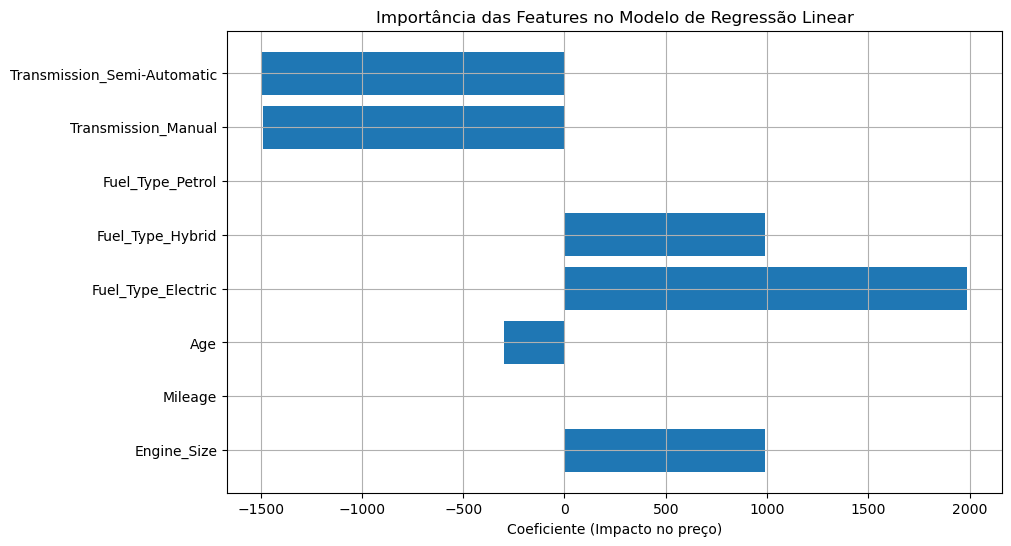

[ 9.92094718e+02 -1.98794639e-02 -2.98462304e+02  1.98569723e+03
  9.88137145e+02 -7.66299620e-01 -1.48975332e+03 -1.49214780e+03]


In [ ]:
coefs = regressor_linear.coef_
features_names = features.columns

plt.figure(figsize=(10,6))
plt.barh(features_names, coefs)
plt.xlabel('Coeficiente (Impacto no preço)')
plt.title('Importância das Features no Modelo de Regressão Linear')
plt.grid(True)
plt.show()


> Fuel_Type_Electric: Ter um carro elétrico é o fator que mais aumenta o preço do carro no modelo, cerca de R$ 2.000,00 a mais que um carro a diesel, mantendo as outras características iguais.

> Fuel_Type_Hybrid: Carros híbridos também tendem a ser mais caros, com um aumento de cerca de R$ 1.000,00 em relação aos a diesel.

> Fuel_Type_Petrol: Ter um carro a gasolina tem um impacto insignificante no preço em comparação com um carro a diesel.

> Transmission: A diferença de valor entre um carro manual e um semiautomático é negligenciável, e ambos são significativamente mais baratos que um carro automático (cerca de 1500 a menos)

> Engine_Size: O tamanho do motor tem um impacto positivo significativo. Um motor maior aumenta o preço do carro em cerca de R$ 1.000,00 por unidade (ex: 1 litro).

> Age: A idade do carro tem um impacto negativo. Para cada ano que o carro envelhece, o preço diminui.

> Mileage: A quilometragem tem um impacto negativo, mas muito pequeno. Embora seja um fator de diminuição do preço, seu impacto é quase insignificante em comparação com as outras variáveis.



## 4) Avaliação do modelo:

In [42]:
# Criando array com as previsões
previsao_precos = regressor_linear.predict(features_test)

price_test = price_test.reshape(-1, 1)
price_test_series = pd.Series(price_test.flatten(), name='Preço Verdadeiro')
price_pred = pd.Series(previsao_precos.flatten(), name='Preço Previsto')

df_resultados = pd.DataFrame({
    'Preço Verdadeiro': price_test.flatten(),
    'Preço Previsto': previsao_precos.flatten()
})

# Métricas de avaliação
mae = mean_absolute_error(price_test, previsao_precos)
mse = mean_squared_error(price_test, previsao_precos)
rmse = np.sqrt(mse)
r2 = r2_score(price_test, previsao_precos)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")



MAE: 20.28
MSE: 4489.42
RMSE: 67.00
R²: 1.00


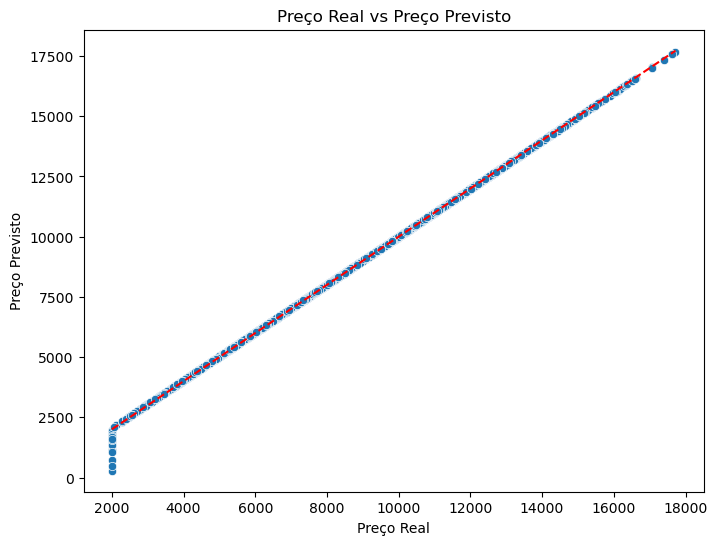

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=price_test.flatten(), y=previsao_precos.flatten())
plt.plot([price_test.min(), price_test.max()], [price_test.min(), price_test.max()], 'r--')  # linha y=x
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preço Real vs Preço Previsto')
plt.show()

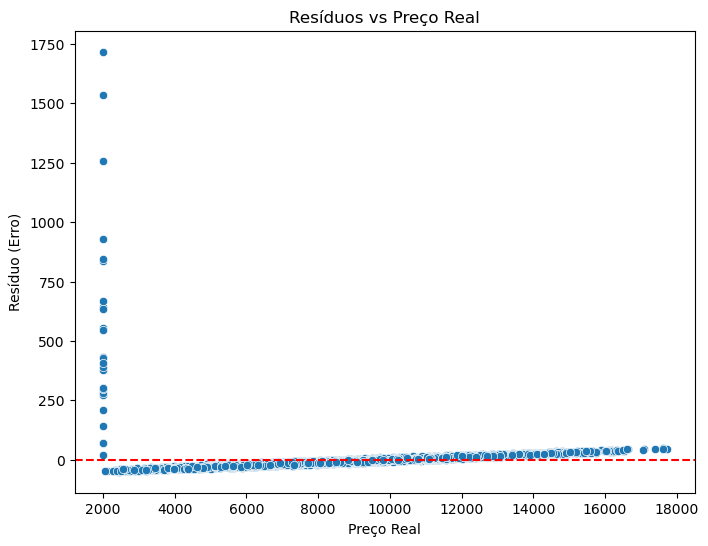

In [44]:
residuos = price_test.flatten() - previsao_precos.flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=price_test.flatten(), y=residuos)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Preço Real')
plt.ylabel('Resíduo (Erro)')
plt.title('Resíduos vs Preço Real')
plt.show()